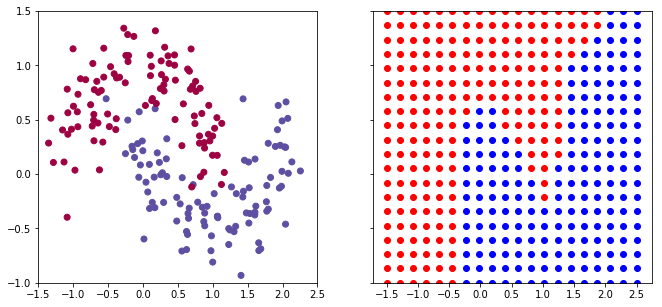

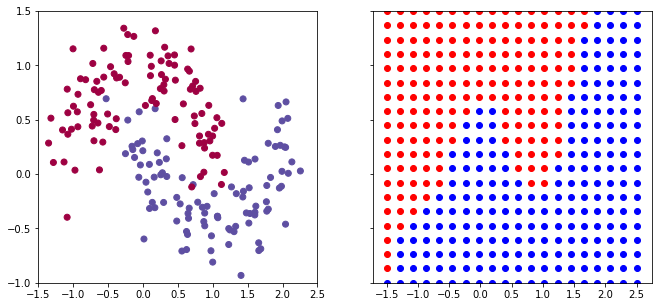

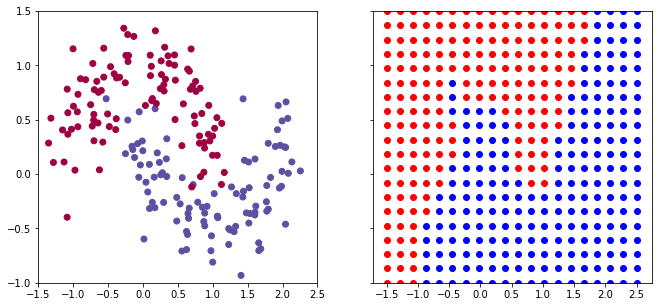

In [2]:
"""
HOMEWORK:
this is an example of NN with a topology "2-5-1" and sigmoid activation on each layer

Part 1: write 2 more activation functions: tanh and relu.
	a)Implement new NN with the same topology "2-5-1" and relu activation on the first layer
	b)Implement new NN with the same topology "2-5-1" and tanh activation on the first layer

Part 2: make a new NN with a topology 2-5-5-1 by adding one more hidden layer
It means that you need to recalculate blocks with initialization parameters, predict and updating parameters

"""

import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets

def sigmoid(x):
	return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return x *(1-x)
def tanh(x):
	return np.tanh(x)

def tanh_prime(x):
    return 1- (tanh(x)**2)

def relu(x):
    return np.maximum(0,x)
def relu_prime(x):
    return np.where(x >0, 1, 0)
        

np.random.seed(0)
#download the dataset
X, labels = sklearn.datasets.make_moons(200, noise=0.20)
y = labels.reshape(-1, 1)

#topology of our Neural Network: 2-5-1
# 2: input layer
# 5: layer 1
# 1: layer 2
input_size = 2
layer1 = 5
layer2 = 1

#initialize parameters
W1 = 2*np.random.random((input_size, layer1)) - 1   #weights matrix of the first layer
b1 = 2*np.random.random((1,          layer1)) - 1   #bias vector of the first layer
W2 = 2*np.random.random((layer1, layer2)) - 1   #weights matrix of the second layer
b2 = 2*np.random.random((1,      layer2)) - 1   #bias vector of the second layer


#lr: learning rate for parameters updating
def train(X, W1, b1, W2, b2, first_act, first_derv):
    lr = 0.1
    for j in range(20000):
            # FEED FORWARD PROPAGATION
        z1 = np.dot(X,W1) + b1    #first layer perceptrons
        a1 = first_act(z1)          #first layer activation
        z2 = np.dot(a1,W2) + b2   #second layer perceptrons
        a2 = sigmoid(z2)          #second layer activation


        # BACKWARD PROPAGATION
        # C = 1/2 * (a2-y)^2      <-- loss function
        # ∂C/∂a2 = a2 - y         <-- simple calculus exercise
        # partial derivative of sigmoid = a2*(1-a2) 
        a2_delta = (a2 - y) * (a2 * (1-a2))
        a1_delta = a2_delta.dot(W2.T) * first_derv(a1)

        # UPDATE PARAMETERS
        W1 = W1 - lr * X.T.dot(a1_delta)
        b1 = b1 - lr * a1_delta.sum(axis=0, keepdims=True)
        W2 = W2 - lr * a1.T.dot(a2_delta)
        b2 = b2 - lr * a2_delta.sum(axis=0, keepdims=True)
    return W1,b1,W2,b2


def predict(X,first_act):
    """
    feedforward
    input: X
    output: final layer output
    W1, b1: parameters of the first  layer
    W2, b2: parameters of the second layer
    z: perceptron = ∑w*x + b
    a: activation of perceptron = sigmoid(z)
    """
    z1 = np.dot(X,W1) + b1
    a1 = first_act(z1)
    z2 = np.dot(a1,W2) + b2
    a2 = 1 / (1 + np.exp(-z2))

    return a2

W1,b1,W2,b2 = train(X,W1,b1,W2,b2,relu, relu_prime)

_, axes = plt.subplots(1, 2, figsize=(11,5), sharey=True)

axes[0].scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Spectral)
axes[0].set_xlim((-1.5, 2.5))
axes[0].set_ylim((-1, 1.5))

test_x1 = np.linspace(-1.5, 2.5, 20)
test_x2 = np.linspace(-1,   1.5, 20)
for x1 in test_x1:
    for x2 in test_x2:
        y_p = predict([[x1, x2]], relu)
        color = 'blue' if y_p > 0.5 else 'red'
        axes[1].scatter(x1, x2, c=color)
plt.show()
#++++++++++++++++++++++++++++++++++++++++++++++++
W1,b1,W2,b2 = train(X,W1,b1,W2,b2,tanh, tanh_prime)

_, axes = plt.subplots(1, 2, figsize=(11,5), sharey=True)

axes[0].scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Spectral)
axes[0].set_xlim((-1.5, 2.5))
axes[0].set_ylim((-1, 1.5))

test_x1 = np.linspace(-1.5, 2.5, 20)
test_x2 = np.linspace(-1,   1.5, 20)
for x1 in test_x1:
    for x2 in test_x2:
        y_p = predict([[x1, x2]], tanh)
        color = 'blue' if y_p > 0.5 else 'red'
        axes[1].scatter(x1, x2, c=color)
plt.show()

#Task2+++++++++++++++++++++++++++++++

input_size = 2
layer1 = 5
layer2=5
layer3 = 1

#initialize parameters
W1 = 2*np.random.random((input_size, layer1)) - 1   #weights matrix of the first layer
b1 = 2*np.random.random((1,          layer1)) - 1   #bias vector of the first layer
W2 = 2*np.random.random((layer1, layer2)) - 1   #weights matrix of the second layer
b2 = 2*np.random.random((1,      layer2)) - 1   #bias vector of the second layer
W3 = 2*np.random.random((layer2, layer3)) - 1   #weights matrix of the first layer
b3 = 2*np.random.random((1,          layer3)) - 1   #bias vector of the first layer


#lr: learning rate for parameters updating
def train_2(X, W1, b1, W2, b2,W3,b3):
    lr = 0.1
    for j in range(20000):
            # FEED FORWARD PROPAGATION
        z1 = np.dot(X,W1) + b1    #first layer perceptrons
        a1 = sigmoid(z1)          #first layer activation
        z2 = np.dot(a1,W2) + b2   #second layer perceptrons
        a2 = sigmoid(z2)          #second layer activation
        z3=np.dot(a2,W3) + b3   #third layer perceptron
        a3=sigmoid(z3)          #third layer activation


        # BACKWARD PROPAGATION
        # C = 1/2 * (a2-y)^2      <-- loss function
        # ∂C/∂a2 = a2 - y         <-- simple calculus exercise
        # partial derivative of sigmoid = a2*(1-a2) 
        a3_delta = (a3 - y) * (a3 * (1-a3))
        a2_delta = a3_delta.dot(W3.T) *  a2*(1-a2)
        a1_delta= a2_delta.dot(W2.T)* a1*(1-a1)

        # UPDATE PARAMETERS
        W1 = W1 - lr * X.T.dot(a1_delta)
        b1 = b1 - lr * a1_delta.sum(axis=0, keepdims=True)
        W2 = W2 - lr * a1.T.dot(a2_delta)
        b2 = b2 - lr * a2_delta.sum(axis=0, keepdims=True)
        W3 = W3 - lr * a2.T.dot(a3_delta)
        b3 = b3 - lr * a3_delta.sum(axis=0, keepdims=True)
    return W1,b1,W2,b2,W3,b3


def predict_2(X,first_act):
    """
    feedforward
    input: X
    output: final layer output
    W1, b1: parameters of the first  layer
    W2, b2: parameters of the second layer
    z: perceptron = ∑w*x + b
    a: activation of perceptron = sigmoid(z)
    """
    z1 = np.dot(X,W1) + b1
    a1 = first_act(z1)
    z2 = np.dot(a1,W2) + b2
    a2 = 1 / (1 + np.exp(-z2))
    z3= np.dot(a2,W3) + b3
    a3=1 / (1 + np.exp(-z3))

    return a3

W1,b1,W2,b2,W3,b3 = train_2(X,W1,b1,W2,b2, W3,b3)

_, axes = plt.subplots(1, 2, figsize=(11,5), sharey=True)

axes[0].scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Spectral)
axes[0].set_xlim((-1.5, 2.5))
axes[0].set_ylim((-1, 1.5))

test_x1 = np.linspace(-1.5, 2.5, 20)
test_x2 = np.linspace(-1,   1.5, 20)
for x1 in test_x1:
    for x2 in test_x2:
        y_p = predict_2([[x1, x2]], sigmoid)
        color = 'blue' if y_p > 0.5 else 'red'
        axes[1].scatter(x1, x2, c=color)
plt.show()

